# Proyecto 1. Pandas
Con el fichero Fichero `sample_NYC_parking_issues.csv`


**Importante:** los cambios se arrastran en las siguientes preguntas.


### Crea un proyecto en Github para esta entrega e incluye un fichero Readme.md
Asegurate que es público ya que solo se puede entregar la URL del proyecto en github.
<hr/>

### A) Limpia el dataframe de aquellas columnas con todos sus campos a NAN

In [2]:
import pandas as pd

df = pd.read_csv("sample_NYC_parking_issues.csv", sep = ";")
df = df.dropna(axis = 1, how = "all")
df

,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,...,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description
0,7192124,7684215310,24824MD,NY,COM,04/23/2014,71,VAN,FRIG,T,...,YYYYYYY,NaN,NaN,WH,NaN,2004.0,NaN,0.0,01 4,71A-Insp Sticker Expired (NYS)
1,1399831,5070680213,9TOPCLAS,NY,OMT,09/14/2013,7,4DSD,DODGE,V,...,NaN,NaN,NaN,BK,NaN,2008.0,NaN,0.0,NaN,FAILURE TO STOP AT RED LIGHT
2,5369188,1356951855,GEL1573,NY,PAS,02/13/2014,71,SUBN,HONDA,P,...,BBBBBBB,ALL,ALL,NaN,0.0,2006.0,-,0.0,NaN,NaN
3,6338606,7713806271,EDU1026,NY,PAS,03/20/2014,21,SUBN,TOYOT,T,...,Y Y,1130A,0100P,GY,NaN,2008.0,NaN,0.0,14 4,21-No Parking (street clean)
4,2823881,7645478044,DXX6460,NY,PAS,11/01/2013,20,4DSD,HONDA,T,...,YYYYY,0800A,0600P,MR,NaN,1996.0,NaN,0.0,03-A,20A-No Parking (Non-COM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,51871,1359994981,42799JW,NY,COM,07/24/2013,14,VAN,FRG,P,...,BBBBBBB,ALL,ALL,WHIT,0.0,2007.0,-,0.0,NaN,NaN
9996,2178598,7531580299,BLANKPLATE,99,999,10/10/2013,21,MCY,TRIUM,T,...,Y,1130A,0100P,BLACK,NaN,0.0,NaN,0.0,01 -,21-No Parking (street clean)
9997,5536586,1353773541,FXW2962,NY,PAS,02/21/2014,16,SDN,MAZDA,T,...,BBBBBBB,0 :,0 :,GR,0.0,1996.0,-,0.0,NaN,NaN
9998,1127482,7207594008,CLR2162,NY,PAS,09/05/2013,37,4DSD,HONDA,T,...,Y,0800A,1000P,SILVE,NaN,2006.0,495-0067,0.0,52-P,37-Expired Muni Meter


### B) Elimina todas las muestras donde la fecha no tenga coherencia: `Vehicle Year`, además transformalas a enteros (2024,2012,2006,etc.)

In [3]:
df["Vehicle Year"] = df["Vehicle Year"][df["Vehicle Year"] > 1].astype("Int64")

### C) Hay marcas de vehículos que no guardan sentido con ninguna marca real (`Vehicle Make`) elimina dichas muestras. Deja constancia de cuantas has borrado.

In [11]:
marca_real = ["DODGE", "HONDA", "TOYOT", "VOLKS", "INTER", "FORD", "BMW", "GMC", "NISSA", "CHEVR", "ISUZU",
              "SAAB", "INFIN", "PLYMO", "LEXUS", "VOLVO", "MERCU", "MITSU", "HYUND", "CHRYS", "CADIL", "SUBAR",
              "PONTI", "ROVER", "JEEP", "MAZDA", "AUDI", "PORSC", "JAGUA", "MINI", "KIA", "BENTL", "VESPA",
              "SUZUK", "SMART", "FIAT", "YAMAH", "FERRA", "AMC"]

df = df[df["Vehicle Make"].isin(marca_real)] 

### D) Representa en un grafíco de barras la cantidad de vehículos (por marca `Vehicle Make`) 

<Axes: xlabel='Vehicle Make'>

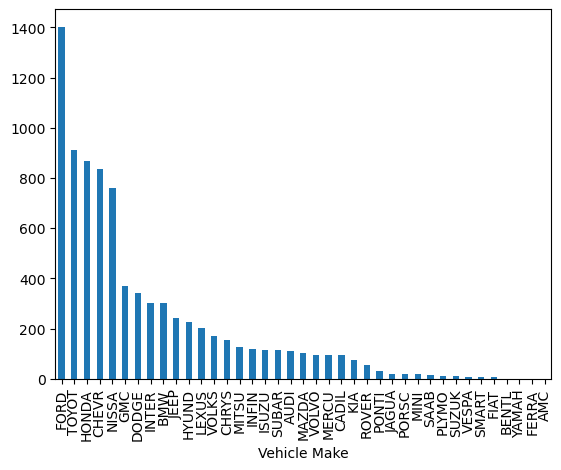

In [12]:

df["Vehicle Make"].value_counts().plot(kind = "bar")

### E) Unifica lo máximo que puedas la terminología de colores. Por ejemplo, valores como `WH` y `wh`y `wh\`hacen referencia al `white`

In [47]:
color_dict = {}

color_dict["WHITE"] = ["WH", "WHITE", "WT", "WHT", "WTH", "WH-BL", "WHIT", "WH/", "WHI", "WHR", "W"]
color_dict["BLUE"] = ["BL", "BLUE", "DKB", "LTBL", "BLU", "DKBL", "BLG", "BLGY", "LTB"]
color_dict["BROWN"] = ["BR", "BROWN", "BRN", "BN", "BROW", "BRW", "BKBR"]
color_dict["BLACK"] = ["BK", "BLACK", "BLK", "BKACK", "BLK/B", "DK/", "BK-RD", "BLG"]
color_dict["GREEN"] = ["GREEN", "GRN", "GREN", "GN", "TNGR", "LTG", "GRG", "GRT", "DKG"]
color_dict["YELLOW"] = ["GOLD", "GD", "GLD",  "YELLO", "YW", "YL", "YEL", "YELOW"]
color_dict["GREY"] = ["GRAY", "SILVE", "GREY", "GR", "SILV", "GRY", "SL", "SILVR", "SLVR", "SLV", "GYTN",
                        "GYGY", "GY-GY", "GYT", "GY", "LTGY", "SIL", "DKGY", "GYBR"]
color_dict["RED"] = ["RD", "RED", "R", "RD/", "DKR", "BURG", "BG"]
color_dict["ORANGE"] = ["ORANG", "OR", "MAROO", "MR"]
color_dict["PURPLE"] = ["PR", "LTP", "PURPL", "RB", "PUR"]
color_dict["TAN"] = ["TAN", "TEN", "TN", "LT/"]

color_dict = {col: key for key, val in color_dict.items() for col in val}

df["Vehicle Color"] = df["Vehicle Color"].replace(color_dict)

/var/folders/x5/8z0mshcj4gb4__ckxrrmpg480000gn/T/ipykernel_7063/3120061944.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Vehicle Color"] = df["Vehicle Color"].replace(color_dict)


In [48]:
df["Vehicle Color"].unique()

array(['BLACK', nan, 'SILVER', 'ORANGE', 'WHITE', 'YELLOW', 'RED',
       'BROWN', 'TAN', 'BLUE', 'OTHER', 'PURPLE', 'GREEN', 'GREY', 'GL',
       'BEIGE', 'NOCL', 'NOC', 'UNKNO', 'TOPAZ', 'WGUTE', 'BUS'],
      dtype=object)

### F) Representa en un gráfico de barras las marca de vehículo segmentadas por colores de vehículos.

<Axes: xlabel='Vehicle Make'>

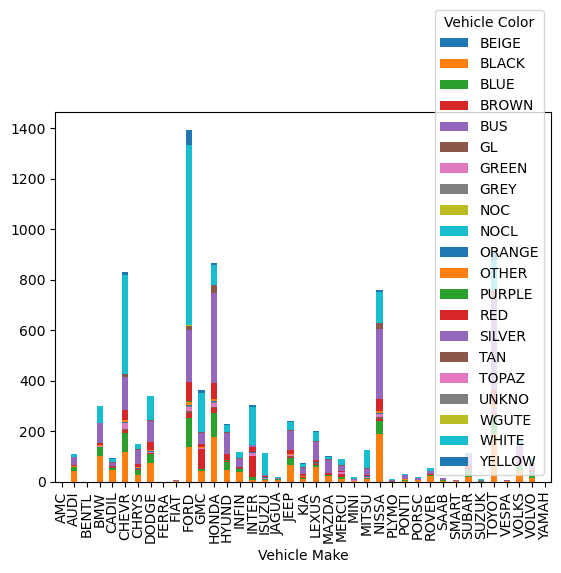

In [49]:
df.groupby(['Vehicle Make', 'Vehicle Color']).size().unstack().plot(kind='bar', stacked=True)

### H) Subé este código a tu repositorio. Incluye un documento Readme.md Indicando tan solo: "H"

### I) Convierte la serie `Issue Date` en una serie temporal y contabiliza las multas por `Violation Code[] y més del Issue Date.

In [26]:
df["Issue Date"]

0       04/23/2014
1       09/14/2013
2       02/13/2014
3       03/20/2014
4       11/01/2013
           ...    
9995    07/24/2013
9996    10/10/2013
9997    02/21/2014
9998    09/05/2013
9999    11/01/2013
Name: Issue Date, Length: 10000, dtype: object

In [28]:
df["Violation Code"]

0       71
1        7
2       71
3       21
4       20
        ..
9995    14
9996    21
9997    16
9998    37
9999    46
Name: Violation Code, Length: 10000, dtype: int64

### J) Visualiza la anterior cuestión (I)

### K) Subé este código a tu repositorio. Sustituye la 'H' del readme.md por un 'end'